Using the [Indian Liver Patient Dataset](https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset) from the UCI Machine Learning repository we will use Ensemble Learning to evaluate how it works relative to individual classifier models. Our target is to predict if a patient suffers from a liver disease by using all the features of the dataset.

This notebook is a [DataCamp](https://learn.datacamp.com/) exercise

In [24]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
df = pd.read_csv('data/indian_liver_patient_preprocessed.csv')

In [37]:
df.head()

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      579 non-null    int64  
 1   Age_std                         579 non-null    float64
 2   Total_Bilirubin_std             579 non-null    float64
 3   Direct_Bilirubin_std            579 non-null    float64
 4   Alkaline_Phosphotase_std        579 non-null    float64
 5   Alamine_Aminotransferase_std    579 non-null    float64
 6   Aspartate_Aminotransferase_std  579 non-null    float64
 7   Total_Protiens_std              579 non-null    float64
 8   Albumin_std                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio_std  579 non-null    float64
 10  Is_male_std                     579 non-null    int64  
 11  Liver_disease                   579 non-null    int64  
dtypes: float64(9), int64(3)
memory usage

In [39]:
df.describe()

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
count,579.000000,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,579.000000,579.000000
mean,291.257340,6.040073e-17,-4.630723e-17,1.730529e-16,9.683292e-18,-1.253076e-16,3.163848e-18,9.349650e-16,-1.016266e-16,-1.215685e-16,0.758204,0.715026
std,168.966657,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,0.428542,0.451792
min,0.000000,-2.516224e+00,-4.685332e-01,-4.954142e-01,-9.384212e-01,-3.886149e-01,-3.467356e-01,-3.489599e+00,-2.820182e+00,-2.026406e+00,0.000000,0.000000
25%,144.500000,-7.269589e-01,-4.042487e-01,-4.598784e-01,-4.761268e-01,-3.175862e-01,-2.949400e-01,-6.290394e-01,-6.784451e-01,-7.737285e-01,1.000000,0.000000
50%,292.000000,1.342668e-02,-3.721064e-01,-4.243426e-01,-3.425751e-01,-2.520212e-01,-2.362382e-01,1.091695e-01,-4.852253e-02,-5.343892e-02,1.000000,1.000000
75%,437.500000,8.155111e-01,-1.149683e-01,-6.898483e-02,2.726037e-02,-1.099638e-01,-8.085131e-02,6.628262e-01,8.333690e-01,4.789491e-01,1.000000,1.000000
max,582.000000,2.789873e+00,1.152053e+01,6.469598e+00,7.473282e+00,1.048424e+01,1.663878e+01,2.877453e+00,2.975106e+00,5.802829e+00,1.000000,1.000000


In [40]:
df.Liver_disease.value_counts()

1    414
0    165
Name: Liver_disease, dtype: int64

In [41]:
df.columns

Index(['Unnamed: 0', 'Age_std', 'Total_Bilirubin_std', 'Direct_Bilirubin_std',
       'Alkaline_Phosphotase_std', 'Alamine_Aminotransferase_std',
       'Aspartate_Aminotransferase_std', 'Total_Protiens_std', 'Albumin_std',
       'Albumin_and_Globulin_Ratio_std', 'Is_male_std', 'Liver_disease'],
      dtype='object')

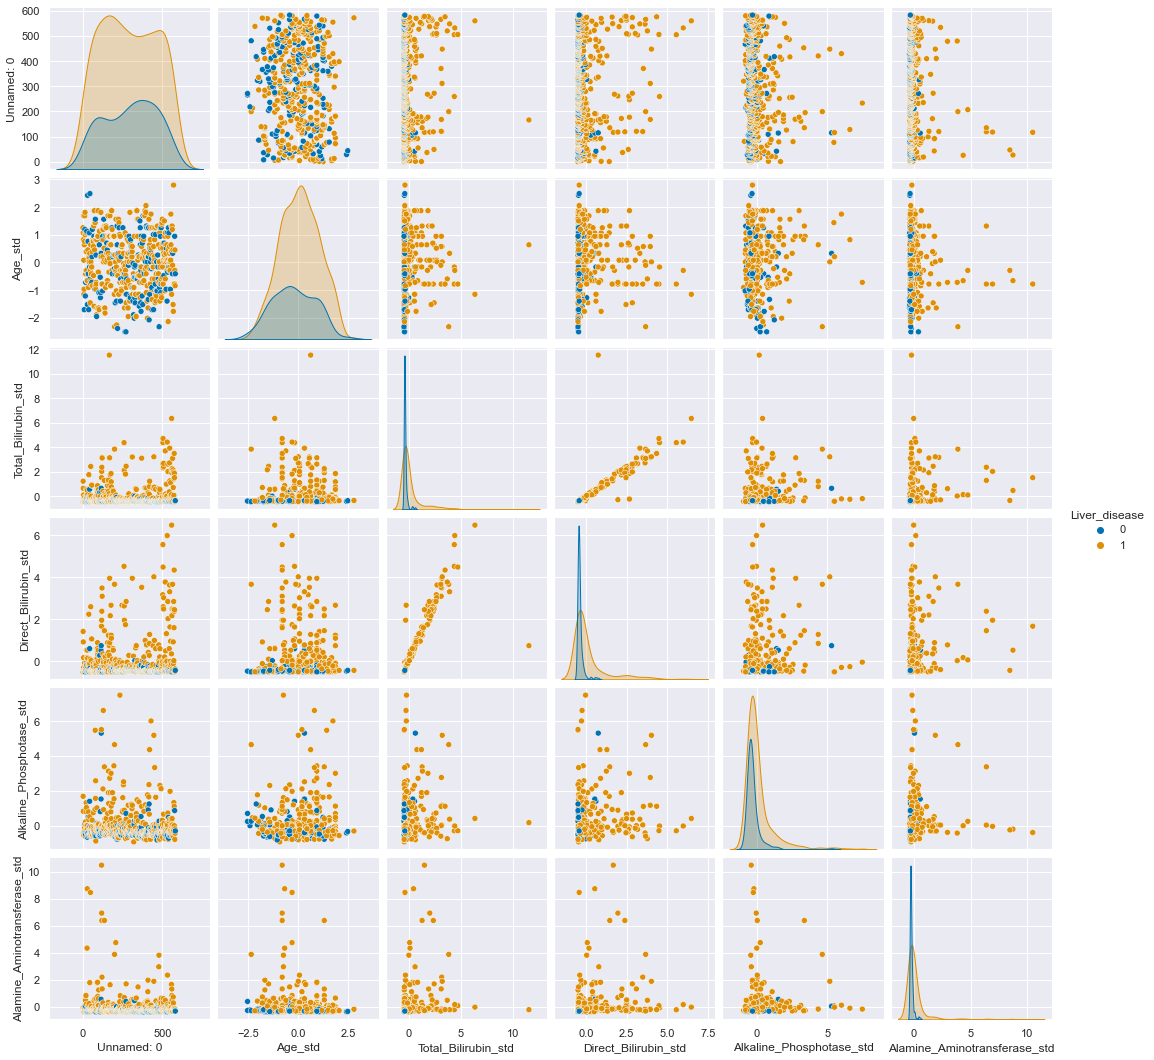

In [42]:
# Plot out pairplots for 5 columns at a time with 'Dataset' as the target
excol = ['Aspartate_Aminotransferase_std', 'Total_Protiens_std', 'Albumin_std','Albumin_and_Globulin_Ratio_std', 'Is_male_std']
df1 = df.drop(excol, axis=1)
sns.set_theme()
sns.pairplot(df1, hue='Liver_disease', palette='colorblind')
plt.show()

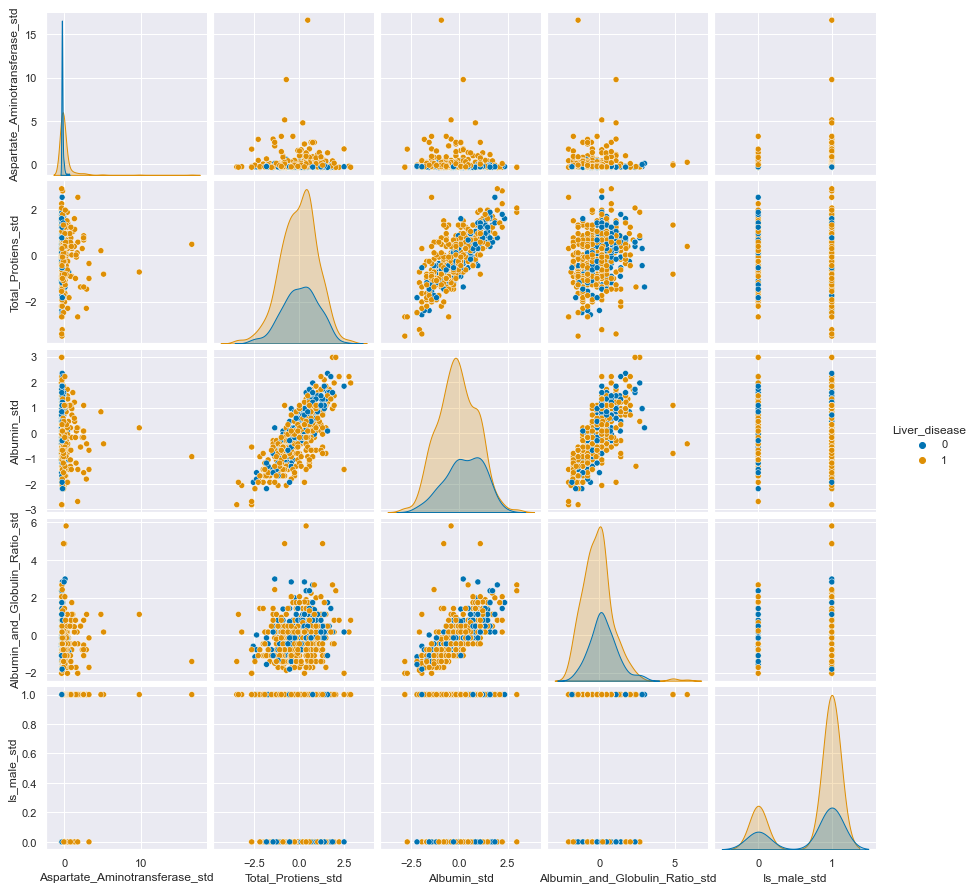

In [43]:
# Plot out pairplots for 5 columns at a time with 'Dataset' as the target
excol = ['Unnamed: 0', 'Age_std', 'Total_Bilirubin_std', 'Direct_Bilirubin_std','Alkaline_Phosphotase_std', 'Alamine_Aminotransferase_std']
df2 = df.drop(excol, axis=1)
sns.set_theme()
sns.pairplot(df2, hue='Liver_disease', palette='colorblind')

## Train on all available features

In [44]:
X = df.drop(['Liver_disease'], axis=1)
y = df['Liver_disease']

In [45]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# Instantiate lr
lr = LogisticRegression(random_state=42)
# Instantiate knn
knn = KNN(n_neighbors=27)
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=42)

In [47]:
# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbors', knn), ('Classification Tree', dt)]

In [50]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.655
K Nearest Neighbors : 0.649
Classification Tree : 0.661


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Evaluate performance with a voting classifier

In [51]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

In [52]:
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers) 

In [53]:
# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.649


# Use a Bagging Classifier

In [55]:
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [56]:
# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=42)

In [57]:
# Load dataset that isn't preprocessed
df_orig = pd.read_csv('data/indian_liver_patient.csv')

In [58]:
df_orig.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [59]:
df_orig.replace({'Female':0, 'Male':1}, inplace=True)

In [62]:
df_orig.rename(columns={'Gender':'Is_male'}, inplace=True)

In [63]:
df_orig.head()

,Age,Is_male,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [77]:
df_orig = df_orig.dropna()

In [78]:
X = df_orig.drop(['Dataset'], axis=1)
y = df_orig['Dataset']

In [79]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Is_male                     579 non-null    int64  
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 54.3 KB


In [81]:
# Fit bc to the training set
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=0.13,
                                                        random_state=42),
                  n_estimators=50, random_state=42)

In [82]:
# Predict test set labels
y_pred = bc.predict(X_test)
# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.64


## Compare OOB accuracy to the test set accuracy of bagging classifier

In [84]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=42)

In [85]:
# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=42)

In [86]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

In [87]:
# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.664, OOB accuracy: 0.704


## AdaBoost Classifier 

In [89]:
# Import dependencies
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [90]:
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=42)

In [91]:
# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=42)

In [92]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Fit ada to the training set
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=42),
                   n_estimators=180, random_state=42)

In [94]:
# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

In [95]:
# Predict probabilities of obtaining the positive class in the test set
from sklearn.metrics import roc_auc_score

In [96]:
# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

In [97]:
# Print the roc_auc_score
print(f"ROC AUC score: {ada_roc_auc:.3f}")

ROC AUC score: 0.644
